In [1]:
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, Precision, Recall, TopKCategoricalAccuracy, CategoricalAccuracy
from tensorflow.keras.callbacks import TensorBoard
from google.colab import drive, files

In [2]:
import tensorflow_datasets as tfds

train_ds, val_ds, test_ds = tfds.load('imdb_reviews', split=['train', 'test[:50%]', 'test[50%:]'], as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.DWRJ2Y_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.DWRJ2Y_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.DWRJ2Y_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [4]:
for review, label in train_ds.take(2):
  print(review)
  print(label)


tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

In [5]:
def standardization(input_data):

  lowercase = tf.strings.lower(input_data)
  output = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return output


In [6]:
from nltk.stem.porter import PorterStemmer

In [7]:
PorterStemmer().stem("tensed")

'tens'

In [8]:
VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 200

In [9]:
from tensorflow.keras.layers import TextVectorization

vectorize_layer = TextVectorization(
    standardize=standardization,
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)


In [10]:
lengths = []
words = []

for review, label in train_ds.take(10):
  for word in tf.strings.split(review, sep=" "):
    if word in words:
      pass
    else:
      words.append(word)
  lengths.append(len(tf.strings.split(review, sep =" ")))

In [11]:
print(len(words))
print(lengths)

913
[116, 112, 132, 88, 81, 289, 557, 111, 223, 127]


In [12]:
training_dataset = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(training_dataset)


In [13]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'i',
 'this',
 'that',
 'it',
 'was',
 'as',
 'for',
 'with',
 'but',
 'on',
 'movie',
 'his',
 'not',
 'are',
 'film',
 'you',
 'have',
 'he',
 'be',
 'at',
 'one',
 'by',
 'an',
 'they',
 'all',
 'from',
 'who',
 'like',
 'so',
 'just',
 'or',
 "it's",
 'has',
 'her',
 'about',
 'if',
 'some',
 'what',
 'out',
 'there',
 'when',
 'very',
 'more',
 'she',
 'even',
 'my',
 'would',
 'good',
 'only',
 'no',
 'their',
 'really',
 'had',
 'which',
 'can',
 'up',
 'were',
 'see',
 'than',
 'we',
 '-',
 'been',
 'into',
 'get',
 'will',
 'much',
 'because',
 'story',
 'most',
 'how',
 'other',
 'first',
 'also',
 "don't",
 'its',
 'do',
 'time',
 'great',
 'me',
 'people',
 'make',
 'could',
 'any',
 'after',
 'then',
 'made',
 'bad',
 'think',
 'many',
 'being',
 'it.',
 'him',
 'never',
 'two',
 'too',
 'little',
 'where',
 'movie.',
 'well',
 'way',
 'watch',
 'your',
 'did',
 'does',
 'best',
 'them',
 'seen',
 'know',
 '

In [14]:
len(vectorize_layer.get_vocabulary())

10000

In [15]:
for review, label in train_ds.take(1):
  print(review)
  print(label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [16]:
def vectorizer(review, label):
  return vectorize_layer(review), label

In [17]:
train_dataset = train_ds.map(vectorizer)
val_dataset = val_ds.map(vectorizer)
# test_dataset = test_ds.map(vectorizer)

In [18]:
train_dataset = train_dataset.batch(32).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(buffer_size = tf.data.AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

Modeling

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense


EMBEDDING_DIM = 64
model = tf.keras.models.Sequential([
    Input(shape =(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,137 (2.45 MB)

 Trainable params: 643,137 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
checkpoint_filepath = "/content/drive/MyDrive/nlp/sentiment_analysis/rnn.keras"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [21]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=5,            # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored metric
)

# Fit the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=[model_checkpoint_callback]  # Add early stopping to callbacks
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.5016 - loss: 0.6972 - val_accuracy: 0.5002 - val_loss: 0.6955
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 115ms/step - accuracy: 0.5708 - loss: 0.6778 - val_accuracy: 0.5025 - val_loss: 0.7002
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 110ms/step - accuracy: 0.6139 - loss: 0.6347 - val_accuracy: 0.5047 - val_loss: 0.7524
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.6770 - loss: 0.5237 - val_accuracy: 0.5023 - val_loss: 0.8563
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.7403 - loss: 0.4063 - val_accuracy: 0.5033 - val_loss: 1.1260
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.7594 - loss: 0.3899 - val_accuracy: 0.5051 - val_loss: 1.0120
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.7598 - loss: 0.3810 - val_accuracy: 0.5048 - val_loss: 1.1166
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.7788 - loss: 0.377

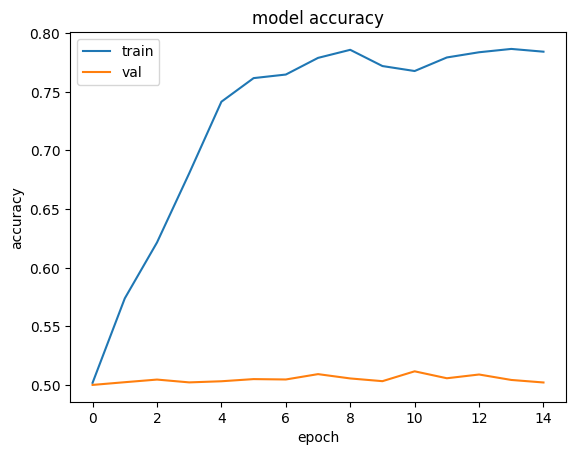

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

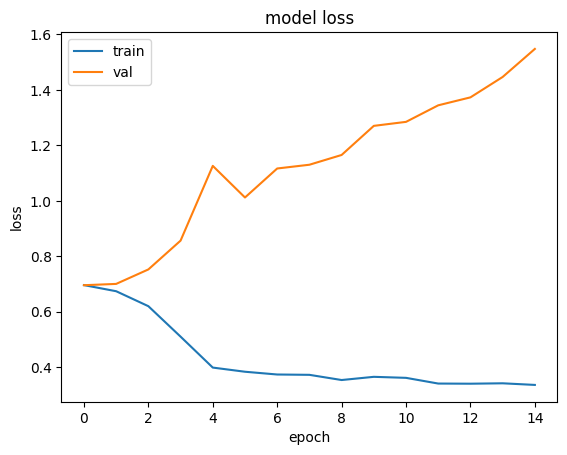

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      6291
           1       0.50      0.54      0.52      6209

    accuracy                           0.50     12500
   macro avg       0.50      0.50      0.50     12500
weighted avg       0.50      0.50      0.50     12500

Confusion Matrix:
[[2909 3382]
 [2840 3369]]


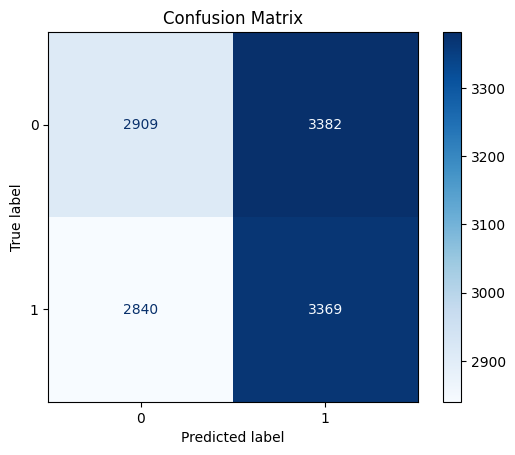

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Make predictions
y_pred_probs = model.predict(val_dataset)  # Predicted probabilities
y_pred = np.round(y_pred_probs)  # Round to get binary predictions (0 or 1)

# Assuming your validation dataset is structured as (features, labels)
y_true = np.concatenate([y for x, y in val_dataset], axis=0)  # True labels

# 2. Calculate precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred))

# 3. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Evaluation

In [26]:
test_dataset = test_ds.map(vectorizer)
test_dataset = test_dataset.batch(32)
model.evaluate(test_dataset)

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5102 - loss: 1.5382


[1.5663484334945679, 0.502560019493103]

# LSTM(Multi layer and Bidirectional)

In [31]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

EMBEDDING_DIM = 64
model = tf.keras.models.Sequential([
     Input(shape =(SEQUENCE_LENGTH,)),
     Embedding(VOCAB_SIZE, EMBEDDING_DIM),

     Bidirectional(LSTM(64, return_sequences = True)),
     Bidirectional(LSTM(32)),

     Dense(64, activation = "relu"),
     Dropout(0.2),
     Dense(1, activation = "sigmoid"),
 ], name = "LSTM")

In [32]:
checkpoint_filepath = "/content/drive/MyDrive/nlp/sentiment_analysis/lstm.keras"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [34]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),  # Correct spelling
    metrics=["accuracy"]
)


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=5,            # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored metric
)

# Fit the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=[model_checkpoint_callback,early_stopping_callback ]  # Add early stopping to callbacks
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 481ms/step - accuracy: 0.5842 - loss: 0.6473 - val_accuracy: 0.8354 - val_loss: 0.3767
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 363s 464ms/step - accuracy: 0.8583 - loss: 0.3381 - val_accuracy: 0.8354 - val_loss: 0.4027
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 361s 462ms/step - accuracy: 0.9007 - loss: 0.2575 - val_accuracy: 0.8474 - val_loss: 0.4049
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 381s 461ms/step - accuracy: 0.9228 - loss: 0.2149 - val_accuracy: 0.8414 - val_loss: 0.4596
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 390s 471ms/step - accuracy: 0.9337 - loss: 0.1883 - val_accuracy: 0.8350 - val_loss: 0.4961
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 377s 482ms/step - accuracy: 0.9273 - loss: 0.1932 - val_accuracy: 0.8392 - val_loss: 0.4958


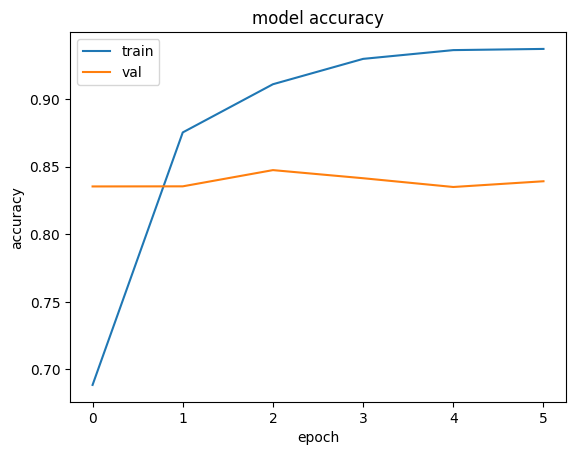

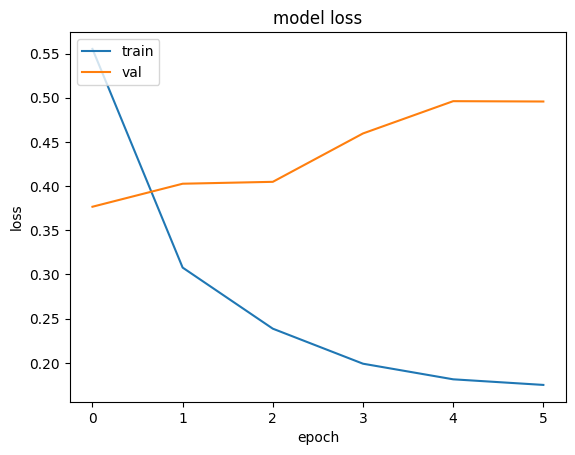

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      6291
           1       0.83      0.84      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500

Confusion Matrix:
[[5197 1094]
 [ 964 5245]]


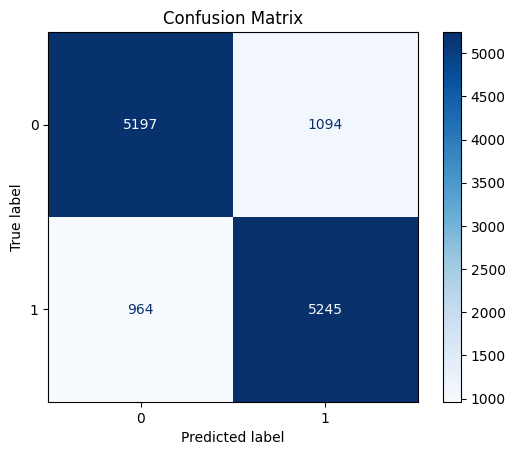

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Make predictions
y_pred_probs = model.predict(val_dataset)  # Predicted probabilities
y_pred = np.round(y_pred_probs)  # Round to get binary predictions (0 or 1)

# Assuming your validation dataset is structured as (features, labels)
y_true = np.concatenate([y for x, y in val_dataset], axis=0)  # True labels

# 2. Calculate precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred))

# 3. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [38]:
test_dataset = test_ds.map(vectorizer)
test_dataset = test_dataset.batch(32)
model.evaluate(test_dataset)

391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.8341 - loss: 0.3778


[0.3790547549724579, 0.8335199952125549]

# CONV 2D

In [46]:
# Build the model

from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),

    Conv1D(32, 3, activation="relu"),

    # Use GlobalMaxPooling1D instead of Flatten to reduce dimensionality
    GlobalMaxPooling1D(),

    Dense(32, activation="relu"),
    Dropout(0.2),

    Dense(1, activation="sigmoid")
], name="CONV1D")

# Print the model summary
model.summary()

Model: "CONV1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 200, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 198, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,265 (2.47 MB)

 Trainable params: 647,265 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
checkpoint_filepath = "/content/drive/MyDrive/nlp/sentiment_analysis/Conv1D.keras"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


In [48]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),  # Correct spelling
    metrics=["accuracy"]
)


In [49]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=5,            # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored metric
)

# Fit the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=[model_checkpoint_callback,early_stopping_callback ]  # Add early stopping to callbacks
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.5461 - loss: 0.6900 - val_accuracy: 0.6981 - val_loss: 0.6464
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7206 - loss: 0.6091 - val_accuracy: 0.7598 - val_loss: 0.5101
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7865 - loss: 0.4832 - val_accuracy: 0.7993 - val_loss: 0.4410
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8239 - loss: 0.4088 - val_accuracy: 0.8166 - val_loss: 0.4039
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8535 - loss: 0.3521 - val_accuracy: 0.8273 - val_loss: 0.3808
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8800 - loss: 0.3057 - val_accuracy: 0.8370 - val_loss: 0.3637
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9040 - loss: 0.2576 - val_accuracy: 0.8442 - val_loss: 0.3515
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9232 - loss: 0.2153 - 

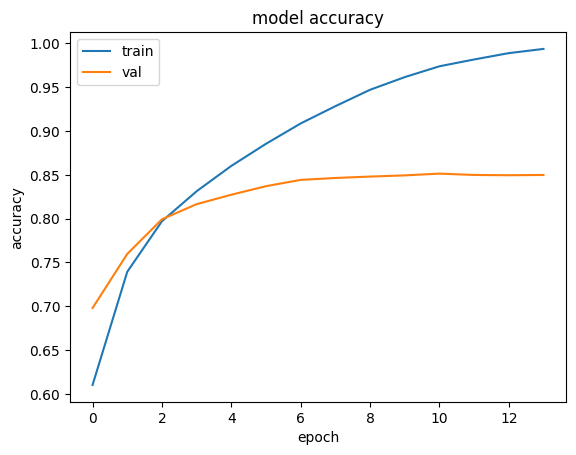

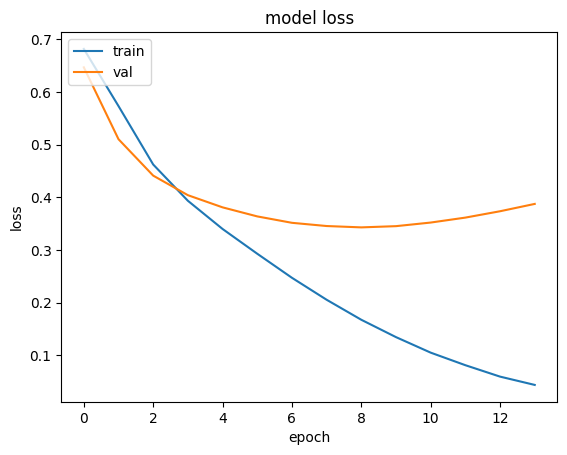

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      6291
           1       0.83      0.87      0.85      6209

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500

Confusion Matrix:
[[5186 1105]
 [ 795 5414]]


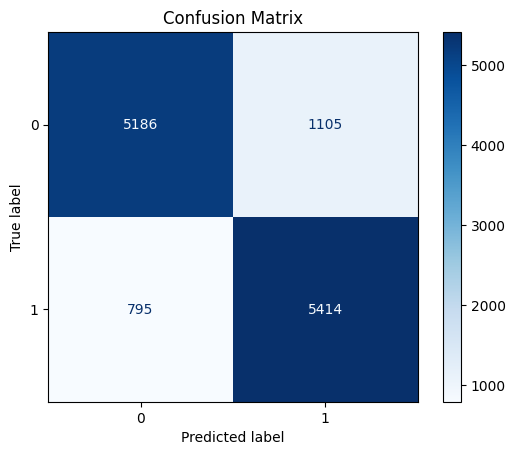

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Make predictions
y_pred_probs = model.predict(val_dataset)  # Predicted probabilities
y_pred = np.round(y_pred_probs)  # Round to get binary predictions (0 or 1)

# Assuming your validation dataset is structured as (features, labels)
y_true = np.concatenate([y for x, y in val_dataset], axis=0)  # True labels

# 2. Calculate precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred))

# 3. Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [52]:
test_dataset = test_ds.map(vectorizer)
test_dataset = test_dataset.batch(32)
model.evaluate(test_dataset)

391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8520 - loss: 0.3421


[0.3430781364440918, 0.8500000238418579]